In [217]:
#Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import optimize as opt
import sympy as sp
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 as nc
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Set working directory
os.chdir('/Users/vinceverdugo/climatemath/data')

In [212]:
#Define style dictionary to ensure plots are consistent
styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8)}
plt.rcParams.update(**styledict)

In [214]:
#Read in C02 emission data from EIA
coe_data = pd.read_excel('table1.xlsx')

#Isolate data from California
ca_co2_ann = np.array([coe_data.iloc[8, 1:-4]]).astype(float)[0]

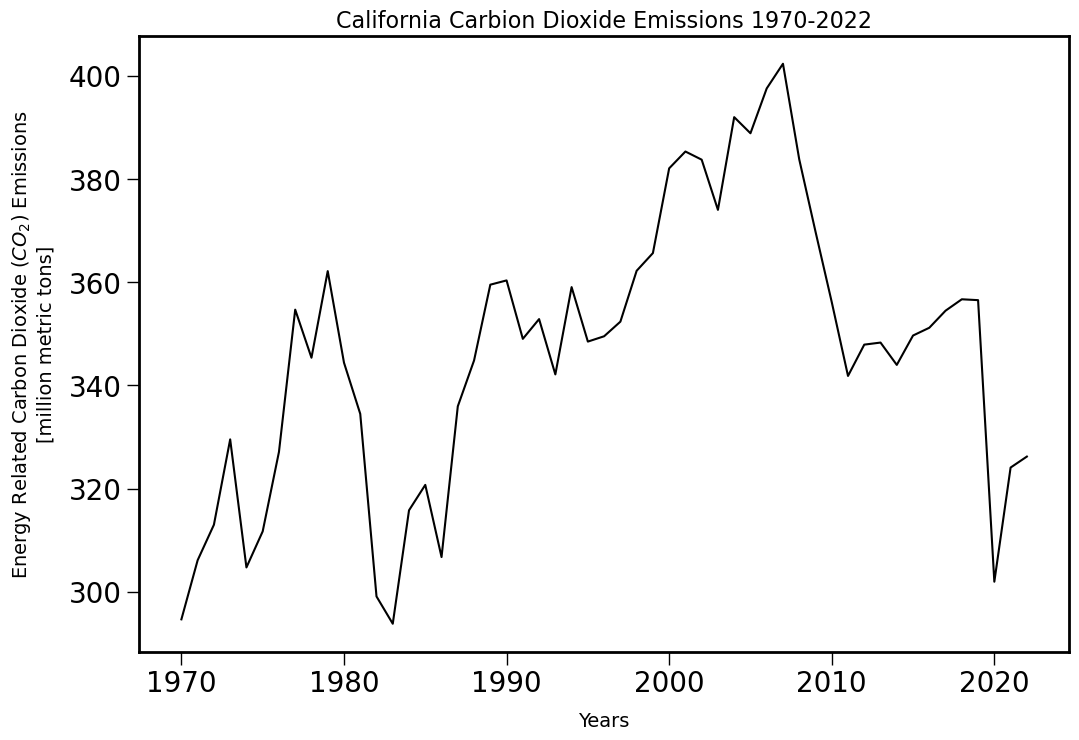

In [216]:
#Define time series 1970 to 2022
t1 = np.arange(1970, 2023)

#Generate graph 
plt.plot(t1, ca_co2_ann, 'k')
#Add labels and title
plt.xlabel('Years', labelpad=10, fontsize=14)
plt.ylabel('Energy Related Carbon Dioxide ($CO_2$) Emissions \n[million metric tons]',
             labelpad=10, fontsize=14)
plt.title('California Carbion Dioxide Emissions 1970-2022',
            fontsize=16)
plt.show()

In [7]:
#Create empty list that will store the names of each file
files = []
#Use loop to create list of file names instead of manually inputting 53 times
for year in np.arange(1970, 2023):
    files.append('StormEvents_details-ftp_v1.0_d'+f'{year}'+'_c20250401.csv')

#Create empty array that will store the count of storm events per year
se_occ = np.zeros(len(files))
#Use loop to read each file and evaluate the number of events per year in CA
for i in range(len(files)):
    s = pd.read_table(files[i],  delimiter=',')
    se_occ[i] = len(s[s['STATE'] == 'CALIFORNIA'])

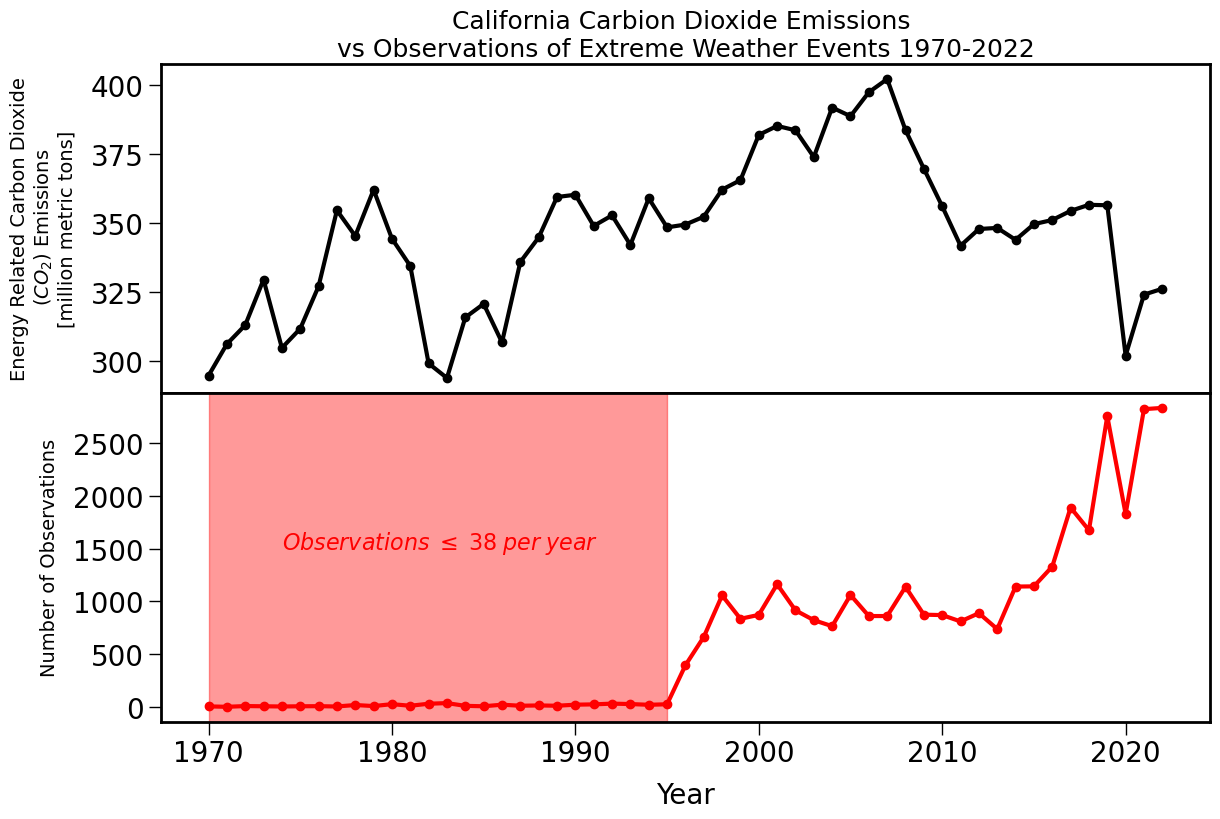

In [9]:
#Create figure with two plots stacked on each other
fig, ax = plt.subplots(2,1, figsize=(12,8))
#First plot: CO2 emission data
ax[0].plot(t1, ca_co2_ann, 'k-o', linewidth=3)
ax[0].set_ylabel('Energy Related Carbon Dioxide\n ($CO_2$) Emissions \n[million metric tons]',
             fontsize=14, labelpad=10)
ax[0].set_title('California Carbion Dioxide Emissions \nvs Observations of Extreme Weather Events 1970-2022',
               fontsize=18)
ax[0].axes.get_xaxis().set_visible(False) #Hide x axis 

#Second plot: Storm occurence 
ax[1].plot(t1, se_occ, 'r-o', linewidth=3)
#Annotations
#
ax[1].fill_between(t1, 0, 1, where= se_occ < 40,
                color='red', alpha=0.4, transform=ax[1].get_xaxis_transform())
ax[1].set_ylabel('Number of Observations', fontsize=14, labelpad=10)
ax[1].set_xlabel('Year', labelpad=10)
ax[1].set_yticks(np.arange(0, 3000, 500))
ax[1].text(1974, 1500, r'$Observations\; \leq \; 38\; per\; year$', color='red', 
          fontsize=16)
fig.tight_layout(pad=0)
plt.show()

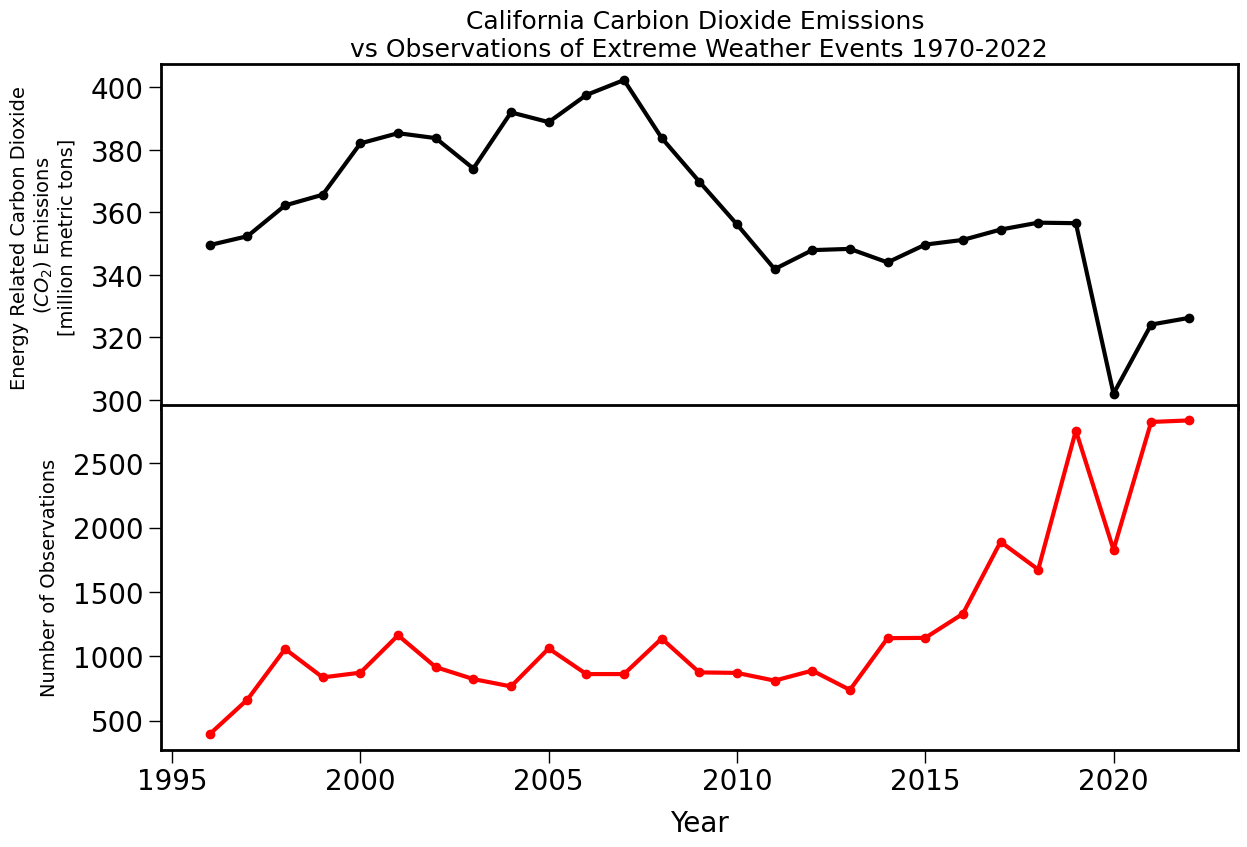

In [226]:
#Create stacked plot using new range
fig, ax = plt.subplots(2,1)
#Same as above
ax[0].plot(t1[26:], ca_co2_ann[26:], 'k-o', linewidth=3)
ax[0].set_ylabel('Energy Related Carbon Dioxide\n ($CO_2$) Emissions \n[million metric tons]',
             fontsize=14, labelpad=10)
ax[0].set_title('California Carbion Dioxide Emissions \nvs Observations of Extreme Weather Events 1970-2022',
               fontsize=18)
ax[0].axes.get_xaxis().set_visible(False)
ax[1].plot(t1[26:], se_occ[26:], 'r-o', linewidth=3)
ax[1].set_ylabel('Number of Observations', fontsize=14, labelpad=10)
ax[1].set_xlabel('Year', labelpad=10)

fig.tight_layout(pad=-1)
plt.show()

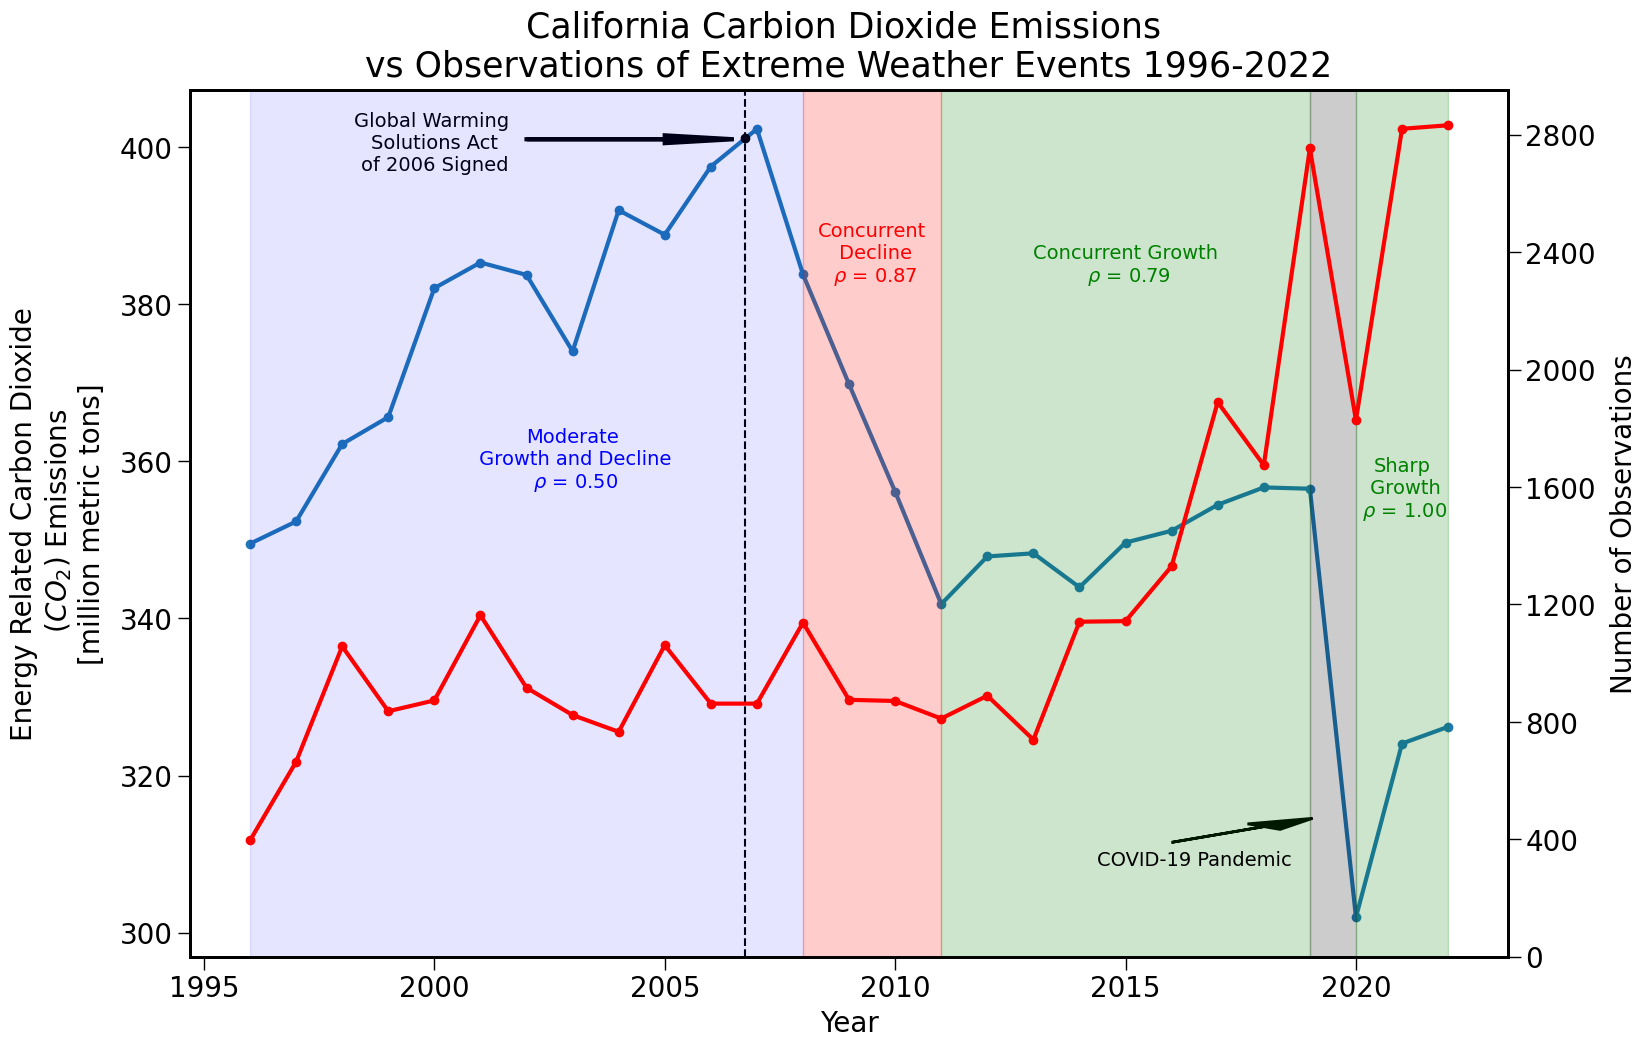

In [228]:
#Plot both lines on the same figure
fig, ax = plt.subplots(figsize=(16,10))

#Plot CO2 time series
ax.plot(t1[26:], ca_co2_ann[26:], '-o', linewidth=3, zorder=1)
ax.set_ylabel('Energy Related Carbon Dioxide\n ($CO_2$) Emissions \n[million metric tons]',
             labelpad=10)
#Annotate signing of Global Warming Solutions Act of 2006
ax.scatter(2006.75, 401.11739959061146, color='k', zorder=1)
ax.axvline(2006.75, 0, 1, color='k', ls='--')
ax.arrow(2002, 401, 3, 0, color='k', linewidth=3, head_width=1)
ax.text(2000, 397, 'Global Warming \nSolutions Act\nof 2006 Signed', 
       horizontalalignment='center', fontsize=14)
#Create title
ax.set_title('California Carbion Dioxide Emissions \nvs Observations of Extreme Weather Events 1996-2022',
            pad=10)

#Create twin plot to plot on same x axis with new y
ax1 = ax.twinx()
#SE time series
ax1.plot(t1[26:], se_occ[26:], 'r-o', linewidth=3)

#Annotate regions and the correlation between each variable 
ax1.fill_between(t1[26:39], 0, 1, 
                color='blue', alpha=0.1, transform=ax1.get_xaxis_transform())
ax1.fill_between(t1[38:42], 0, 1,
                color='red', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.fill_between(t1[41:-3], 0, 1,
                color='green', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.fill_between(t1[-4:-2], 0, 1,
                color='black', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.fill_between(t1[-3:], 0, 1,
                color='green', alpha=0.2, transform=ax1.get_xaxis_transform())

ax1.text(2003, 1600, f'Moderate\n Growth and Decline\n $\\rho$ = {np.corrcoef(se_occ[26:39], 
                                           ca_co2_ann[26:39])[0, 1]:.2f}', 
       color='blue', horizontalalignment='center', 
         fontsize=14,)

ax1.text(2009.5, 2300, f'Concurrent\n Decline\n $\\rho$ = {np.corrcoef(se_occ[38:42], 
                                           ca_co2_ann[38:42])[0, 1]:.2f}', 
       color='red', horizontalalignment='center', 
         fontsize=14,)

ax1.text(2015, 2300, f'Concurrent Growth\n $\\rho$ = {np.corrcoef(se_occ[41:-3], 
                                           ca_co2_ann[41:-3])[0, 1]:.2f}', 
       color='green', horizontalalignment='center', 
       fontsize=14,)

ax1.text(2021, 1500, f'Sharp\n Growth\n $\\rho$ = {np.corrcoef(se_occ[-3:], 
                                           ca_co2_ann[-3:])[0, 1]:.2f}', 
       color='green', horizontalalignment='center', 
       fontsize=14,)

ax.arrow(2016, 311.5, 2, 2, color='k', linewidth=2, head_width=1)

ax1.text(2016.5, 310, 'COVID-19 Pandemic', 
       horizontalalignment='center', fontsize=14)

#Figure ticks and lables
ax1.set_ylabel('Number of Observations', labelpad=10)
ax.set_xlabel('Year', labelpad=5)
ax1.set_yticks(np.arange(0, 3000, 400))
fig.tight_layout(pad=-1)

plt.show()

In [208]:
#Read in excel file of data
df = pd.read_excel('ghgp_data_2010.xlsx')
df2 = pd.read_excel('ghgp_data_2022.xlsx')

#Find rows where state is CA, isolate columns 8, 9, and 13
#Lat = 8
#Long = 9
#Total reported direct emissions = 13
ca_rep2010 = np.array(df[df.iloc[:,4]=='CA'].iloc[:, [8, 9, 13]])
ca_rep2022 = np.array(df2[df2.iloc[:,4]=='CA'].iloc[:, [8, 9, 13]])

In [229]:
#Read in Storm Event data for 2010
s1 = pd.read_table('StormEvents_details-ftp_v1.0_d2010_c20250401.csv',  delimiter=',')
#Isolate California storms that had lat and lon coordinates
s2 = s1[(s1['STATE'] == 'CALIFORNIA') & s1['END_LAT'].notna() & s1['END_LON'].notna()]
#Create array of coordinates
s2_loc = np.array(s5.loc[:, 'END_LAT':"END_LON"])

In [230]:
#Follow same steps as cell from above, for 2022
s3 = pd.read_table('StormEvents_details-ftp_v1.0_d2022_c20250401.csv',  delimiter=',')
s4 = s3[(s3['STATE'] == 'CALIFORNIA') & s3['END_LAT'].notna() & s3['END_LON'].notna()]
s4_loc = np.array(s4.loc[:, 'END_LAT':"END_LON"])

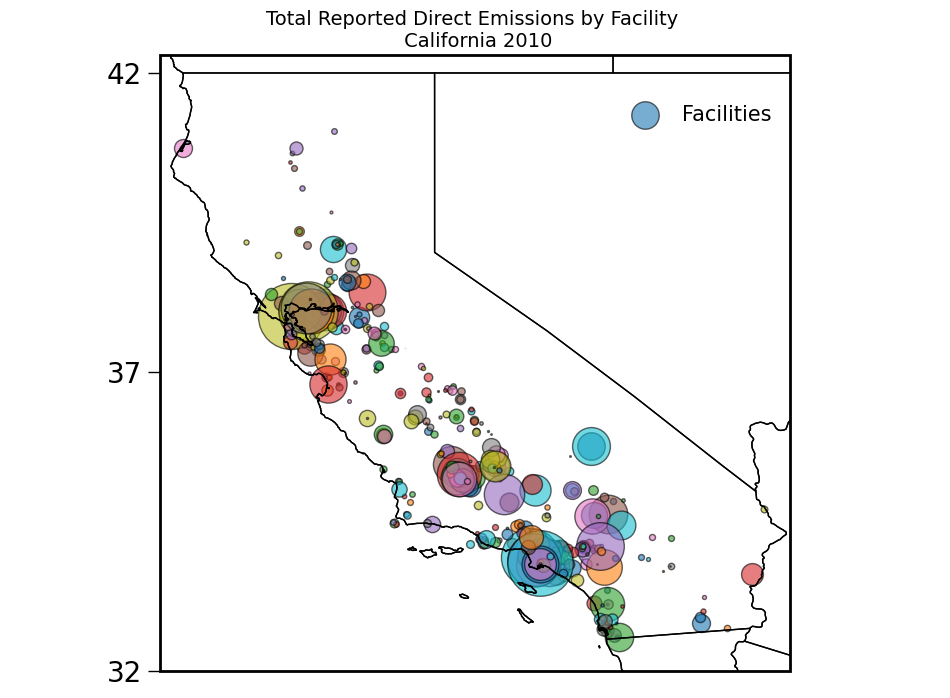

In [233]:
#Create map with facilites overlayed
fig, ax = plt.subplots()
ax.axis('off')
#using cartopy map
axm = plt.subplot(111, projection=cartopy.crs.PlateCarree())
axm.set_extent([235.4, 245.95, 32.3, 42.3])
axm.coastlines()
#Add state outlines
axm.add_feature(cartopy.feature.STATES)

#Plot each location 
for i in range(len(ca_rep2010)):
    loc = ca_rep2010[i]
    #Use label for only first location
    if i == 0:
        #Using the reported emissions per facility, modify the size of the point
        #Larger points represent higher emissions and vise versa
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6, label='Facilities')
    else:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6)

#Ticks and labels
axm.set_yticks([i for i in range(32,43,5)])
axm.set_title('Total Reported Direct Emissions by Facility \n California 2010', fontsize=14)
axm.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

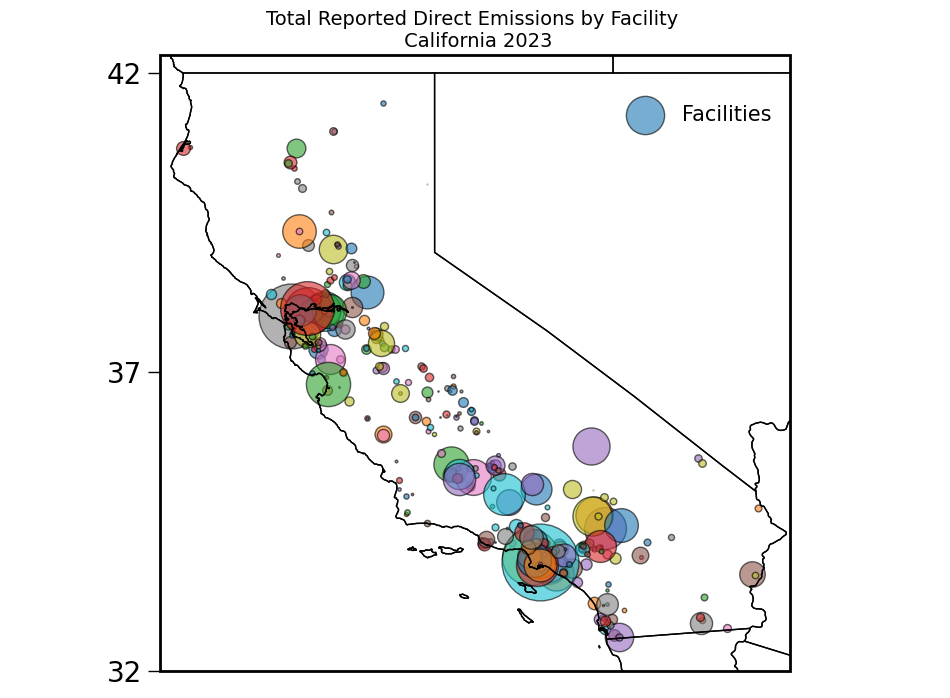

In [234]:
#Follow same steps as above for 2023
fig, ax = plt.subplots()
ax.axis('off')
axm = plt.subplot(111, projection=cartopy.crs.PlateCarree())
axm.set_extent([235.4, 245.95, 32.3, 42.3])
axm.coastlines()
axm.add_feature(cartopy.feature.STATES)

for i in range(len(ca_rep2023)):
    loc = ca_rep2023[i]
    #Label
    if i == 0:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6, label='Facilities')
    else:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6)

axm.set_yticks([i for i in range(32,43,5)])
axm.set_title('Total Reported Direct Emissions by Facility \n California 2023', fontsize=14)
axm.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
plt.show()

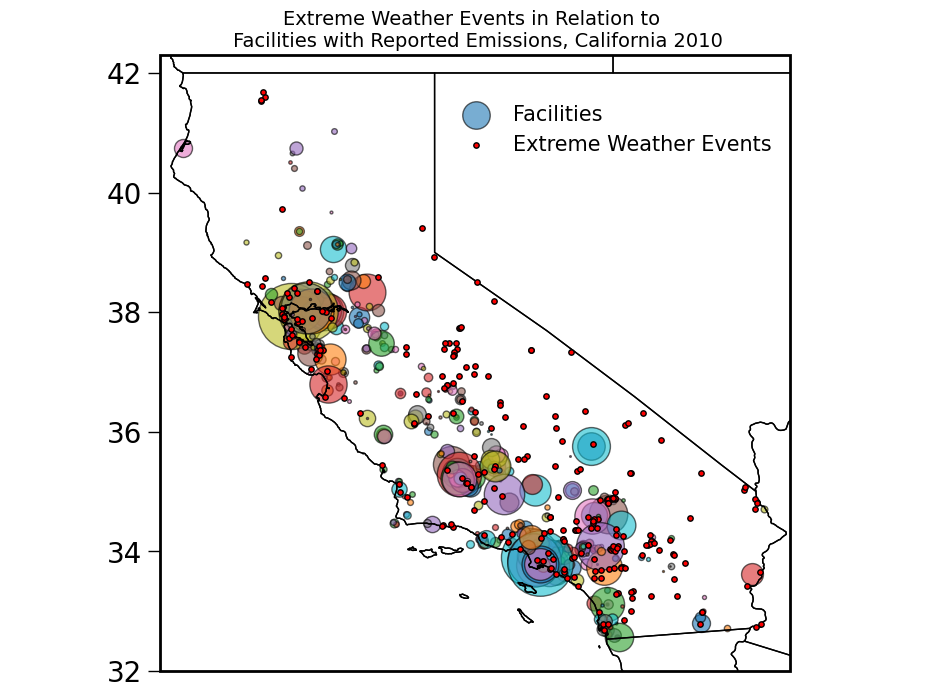

In [235]:
#Recreate previous figures while overlaying locations of storms 
fig, ax = plt.subplots()
ax.axis('off')
axm = plt.subplot(111, projection=cartopy.crs.PlateCarree())
axm.set_extent([235.4, 245.95, 32.3, 42.3])
axm.coastlines()
axm.add_feature(cartopy.feature.STATES)

for i in range(len(ca_rep2010)):
    loc = ca_rep2010[i]
    #First location label
    if i == 0:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6, label='Facilities')
    else:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6)

#Create array of just latitudes of storms
slats = np.array([loc[0] for loc in s2_loc])
#Repeat with longitudes
slons = np.array([loc[1] for loc in s2_loc])
#Reconfigure longitude coordinates to match cartopy
if np.all(slons < 0):
    slons = 360 + slons
#Plot each storm point
axm.scatter(slons, slats, fc = 'red', edgecolor='k', s=15, zorder=2, label='Extreme Weather Events')

#Ticks and labels
axm.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
axm.set_yticks([32, 34, 36, 38, 40, 42])
axm.set_title('Extreme Weather Events in Relation to \n Facilities with Reported Emissions, California 2010', fontsize=14)
plt.show()

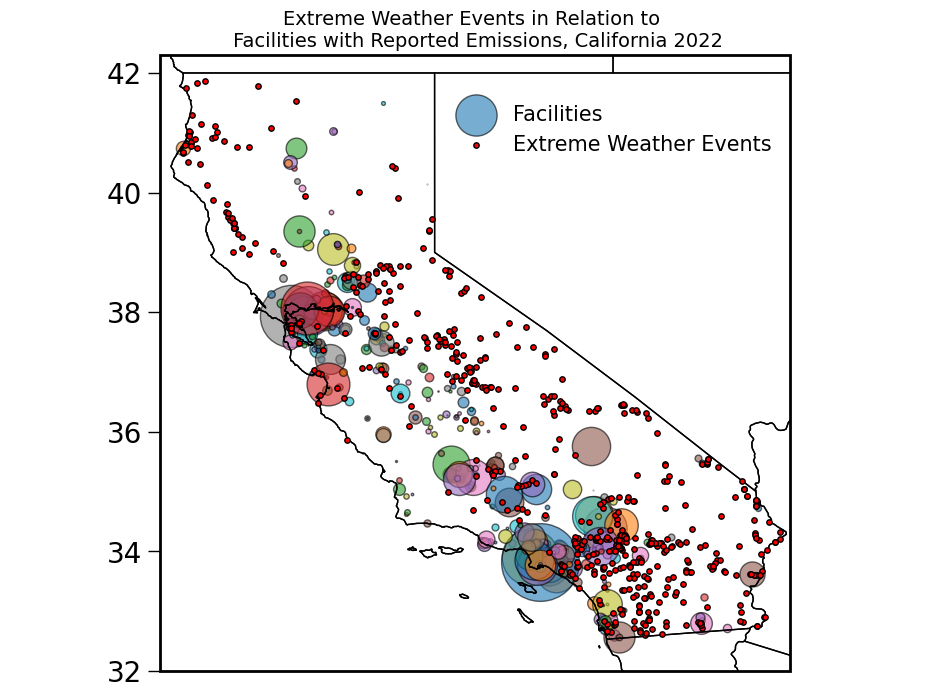

In [236]:
#Repeat figure from above but for 2023
fig, ax = plt.subplots()
ax.axis('off')
axm = plt.subplot(111, projection=cartopy.crs.PlateCarree())
axm.set_extent([235.4, 245.95, 32.3, 42.3])
axm.coastlines()
axm.add_feature(cartopy.feature.STATES)

for i in range(len(ca_rep2022)):
    loc = ca_rep2022[i]
    #Use label for only first location
    if i == 0:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6, label='Facilities')
    else:
        axm.scatter(loc[1], loc[0], loc[2]*0.0005, edgecolor='k', alpha=0.6)

slats2 = np.array([loc[0] for loc in s4_loc])
slons2 = np.array([loc[1] for loc in s4_loc])
if np.all(s7lons < 0):
    slons2 = 360 + slons2
axm.scatter(slons2, slats2, fc = 'red', edgecolor='k', s=15, zorder=2, label='Extreme Weather Events')

axm.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

axm.set_yticks([32, 34, 36, 38, 40, 42])
axm.set_title('Extreme Weather Events in Relation to \n Facilities with Reported Emissions, California 2022', fontsize=14)

plt.show()